<a href="https://colab.research.google.com/github/ravisiddam/DL_Project_1/blob/master/Transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!xvfb-run -s "-screen 0 1400x900x24" jupyter notebook

/bin/bash: xvfb-run: command not found


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

In [3]:
import gym
env = gym.make('CartPole-v0')
env.reset()
render = lambda : plt.imshow(env.render(mode='rgb_array'))
for _ in range(1000):
    render()
    env.step(env.action_space.sample()) # take a random action
env.close()

NameError: ignored

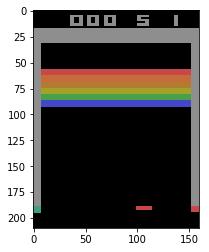

In [4]:
import gym
import matplotlib.pyplot as plt
%matplotlib inline

env = gym.make('Breakout-v0') # insert your favorite environment
render = lambda : plt.imshow(env.render(mode='rgb_array'))
env.reset()
render()

In [1]:
!wget --passive-ftp --ftp-user FoodImage@grebvm2.epfl.ch \
	--ftp-password Cahc1moo ftp://tremplin.epfl.ch/Food-5K.zip 

--2019-06-05 00:20:57--  ftp://tremplin.epfl.ch/Food-5K.zip
           => ‘Food-5K.zip’
Resolving tremplin.epfl.ch (tremplin.epfl.ch)... 128.178.50.75, 2001:620:618:132:1:80b2:324b:1
Connecting to tremplin.epfl.ch (tremplin.epfl.ch)|128.178.50.75|:21... connected.
Logging in as FoodImage@grebvm2.epfl.ch ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD not needed.
==> SIZE Food-5K.zip ... 446919921
==> PASV ... done.    ==> RETR Food-5K.zip ... done.
Length: 446919921 (426M) (unauthoritative)

Food-5K.zip         100%[===================>] 426.22M  21.9MB/s    in 23s     

2019-06-05 00:21:23 (18.5 MB/s) - ‘Food-5K.zip’ saved [446919921]



In [2]:
!unzip Food-5K.zip

Archive:  Food-5K.zip
   creating: evaluation/
  inflating: evaluation/.DS_Store    
   creating: __MACOSX/
   creating: __MACOSX/evaluation/
  inflating: __MACOSX/evaluation/._.DS_Store  
  inflating: evaluation/0_0.jpg      
  inflating: evaluation/0_1.jpg      
  inflating: evaluation/0_10.jpg     
  inflating: evaluation/0_100.jpg    
  inflating: evaluation/0_101.jpg    
  inflating: evaluation/0_102.jpg    
  inflating: evaluation/0_103.jpg    
  inflating: evaluation/0_104.jpg    
  inflating: evaluation/0_105.jpg    
  inflating: evaluation/0_106.jpg    
  inflating: evaluation/0_107.jpg    
  inflating: evaluation/0_108.jpg    
  inflating: evaluation/0_109.jpg    
  inflating: evaluation/0_11.jpg     
  inflating: evaluation/0_110.jpg    
  inflating: evaluation/0_111.jpg    
  inflating: evaluation/0_112.jpg    
  inflating: evaluation/0_113.jpg    
  inflating: evaluation/0_114.jpg    
  inflating: evaluation/0_115.jpg    
  inflating: evaluation/0_116.jpg    
  inflating: 

In [0]:
import os
ORIG_INPUT_DATASET = "Food-5K"
BASE_PATH = "dataset"
# define the names of the training, testing, and validation
# directories
TRAIN = "training"
TEST = "evaluation"
VAL = "validation"
# initialize the list of class label names
CLASSES = ["non_food", "food"]
# set the batch size
BATCH_SIZE = 32

In [0]:
LE_PATH = os.path.sep.join(["output", "le.cpickle"])
BASE_CSV_PATH = "output"
 
# set the path to the serialized model after training
MODEL_PATH = os.path.sep.join(["output", "model.cpickle"])

In [0]:
! mkdir Food-5K

In [0]:
! cd Food-5K

In [7]:
!cd..


/bin/bash: cd..: command not found


In [8]:
ls

evaluation/  Food-5K.zip  sample_data/  validation/
Food-5K/     __MACOSX/    training/


In [0]:
!mv evaluation/ Food-5K/

In [0]:
!mv training/ Food-5K/

In [0]:
!mv validation/ Food-5K/

In [12]:
!ls

Food-5K  Food-5K.zip  __MACOSX	sample_data


In [0]:
!cd Food-5K/

In [14]:
!ls

Food-5K  Food-5K.zip  __MACOSX	sample_data


In [0]:
!mkdir dataset

In [0]:
!mkdir output

In [0]:
!mkdir pyimagesearch

In [0]:
!mv config.py pyimagesearch/

In [19]:
# import the necessary packages
from pyimagesearch import config
from imutils import paths
import shutil
import os
 
# loop over the data splits
for split in (config.TRAIN, config.TEST, config.VAL):
	# grab all image paths in the current split
	print("[INFO] processing '{} split'...".format(split))
	p = os.path.sep.join([config.ORIG_INPUT_DATASET, split])
	imagePaths = list(paths.list_images(p))

[INFO] processing 'training split'...
[INFO] processing 'evaluation split'...
[INFO] processing 'validation split'...


In [0]:
	# loop over the image paths
	for imagePath in imagePaths:
		# extract class label from the filename
		filename = imagePath.split(os.path.sep)[-1]
		label = config.CLASSES[int(filename.split("_")[0])]
 
		# construct the path to the output directory
		dirPath = os.path.sep.join([config.BASE_PATH, split, label])
 
		# if the output directory does not exist, create it
		if not os.path.exists(dirPath):
			os.makedirs(dirPath)
 
		# construct the path to the output image file and copy it
		p = os.path.sep.join([dirPath, filename])
		shutil.copy2(imagePath, p)

In [21]:
!python build_dataset.py

[INFO] processing 'training split'...
[INFO] processing 'evaluation split'...
[INFO] processing 'validation split'...


In [22]:
# import the necessary packages
from sklearn.preprocessing import LabelEncoder
from keras.applications import VGG16
from keras.applications import imagenet_utils
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from pyimagesearch import config
from imutils import paths
import numpy as np
import pickle
import random
import os
 
# load the VGG16 network and initialize the label encoder
print("[INFO] loading network...")
model = VGG16(weights="imagenet", include_top=False)
le = None

Using TensorFlow backend.


[INFO] loading network...
Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 1s 0us/step


In [23]:
# loop over the data splits
for split in (config.TRAIN, config.TEST, config.VAL):
	# grab all image paths in the current split
	print("[INFO] processing '{} split'...".format(split))
	p = os.path.sep.join([config.BASE_PATH, split])
	imagePaths = list(paths.list_images(p))
 
	# randomly shuffle the image paths and then extract the class
	# labels from the file paths
	random.shuffle(imagePaths)
	labels = [p.split(os.path.sep)[-2] for p in imagePaths]
 
	# if the label encoder is None, create it
	if le is None:
		le = LabelEncoder()
		le.fit(labels)
 
	# open the output CSV file for writing
	csvPath = os.path.sep.join([config.BASE_CSV_PATH,
		"{}.csv".format(split)])
	csv = open(csvPath, "w")

[INFO] processing 'training split'...
[INFO] processing 'evaluation split'...
[INFO] processing 'validation split'...


In [24]:
# loop over the images in batches
for (b, i) in enumerate(range(0, len(imagePaths), config.BATCH_SIZE)):
		# extract the batch of images and labels, then initialize the
		# list of actual images that will be passed through the network
		# for feature extraction
		print("[INFO] processing batch {}/{}".format(b + 1,
			int(np.ceil(len(imagePaths) / float(config.BATCH_SIZE)))))
		batchPaths = imagePaths[i:i + config.BATCH_SIZE]
		batchLabels = le.transform(labels[i:i + config.BATCH_SIZE])
		batchImages = []

[INFO] processing batch 1/32
[INFO] processing batch 2/32
[INFO] processing batch 3/32
[INFO] processing batch 4/32
[INFO] processing batch 5/32
[INFO] processing batch 6/32
[INFO] processing batch 7/32
[INFO] processing batch 8/32
[INFO] processing batch 9/32
[INFO] processing batch 10/32
[INFO] processing batch 11/32
[INFO] processing batch 12/32
[INFO] processing batch 13/32
[INFO] processing batch 14/32
[INFO] processing batch 15/32
[INFO] processing batch 16/32
[INFO] processing batch 17/32
[INFO] processing batch 18/32
[INFO] processing batch 19/32
[INFO] processing batch 20/32
[INFO] processing batch 21/32
[INFO] processing batch 22/32
[INFO] processing batch 23/32
[INFO] processing batch 24/32
[INFO] processing batch 25/32
[INFO] processing batch 26/32
[INFO] processing batch 27/32
[INFO] processing batch 28/32
[INFO] processing batch 29/32
[INFO] processing batch 30/32
[INFO] processing batch 31/32
[INFO] processing batch 32/32


In [0]:
# loop over the images and labels in the current batch
for imagePath in batchPaths:
			# load the input image using the Keras helper utility
			# while ensuring the image is resized to 224x224 pixels
			image = load_img(imagePath, target_size=(224, 224))
			image = img_to_array(image)
 
			# preprocess the image by (1) expanding the dimensions and
			# (2) subtracting the mean RGB pixel intensity from the
			# ImageNet dataset
			image = np.expand_dims(image, axis=0)
			image = imagenet_utils.preprocess_input(image)
 
			# add the image to the batch
			batchImages.append(image)

In [0]:
batchImages = np.vstack(batchImages)
features = model.predict(batchImages, batch_size=config.BATCH_SIZE)
features = features.reshape((features.shape[0], 7 * 7 * 512))

In [0]:
# loop over the class labels and extracted features
for (label, vec) in zip(batchLabels, features):
			# construct a row that exists of the class label and
			# extracted features
			vec = ",".join([str(v) for v in vec])
			csv.write("{},{}\n".format(label, vec))
csv.close()

# serialize the label encoder to disk
f = open(config.LE_PATH, "wb")
f.write(pickle.dumps(le))
f.close()

In [28]:
!python extract_features.py

Using TensorFlow backend.
[INFO] loading network...
Instructions for updating:
Colocations handled automatically by placer.
2019-06-05 00:52:00.869585: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-06-05 00:52:00.869827: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x88a0580 executing computations on platform Host. Devices:
2019-06-05 00:52:00.869867: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2019-06-05 00:52:00.993505: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-06-05 00:52:00.993988: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x88a0840 executing computations on platform CUDA. Devices:
2019-06-05 00:52:00.994016: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): Te

In [0]:
# import the necessary packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from pyimagesearch import config
import numpy as np
import pickle
import os
 
def load_data_split(splitPath):
	# initialize the data and labels
	data = []
	labels = []
 
	# loop over the rows in the data split file
	for row in open(splitPath):
		# extract the class label and features from the row
		row = row.strip().split(",")
		label = row[0]
		features = np.array(row[1:], dtype="float")
 
		# update the data and label lists
		data.append(features)
		labels.append(label)
 
	# convert the data and labels to NumPy arrays
	data = np.array(data)
	labels = np.array(labels)
 
	# return a tuple of the data and labels
	return (data, labels)

In [30]:
# derive the paths to the training and testing CSV files
trainingPath = os.path.sep.join([config.BASE_CSV_PATH,
	"{}.csv".format(config.TRAIN)])
testingPath = os.path.sep.join([config.BASE_CSV_PATH,
	"{}.csv".format(config.TEST)])
 
# load the data from disk
print("[INFO] loading data...")
(trainX, trainY) = load_data_split(trainingPath)
(testX, testY) = load_data_split(testingPath)
 
# load the label encoder from disk
le = pickle.loads(open(config.LE_PATH, "rb").read())

[INFO] loading data...


In [31]:
# train the model
print("[INFO] training model...")
model = LogisticRegression(solver="lbfgs", multi_class="auto")
model.fit(trainX, trainY)
 
# evaluate the model
print("[INFO] evaluating...")
preds = model.predict(testX)
print(classification_report(testY, preds, target_names=le.classes_))
 
# serialize the model to disk
print("[INFO] saving model...")
f = open(config.MODEL_PATH, "wb")
f.write(pickle.dumps(model))
f.close()

[INFO] training model...
[INFO] evaluating...
              precision    recall  f1-score   support

        food       0.99      0.98      0.98       500
    non_food       0.98      0.99      0.99       500

    accuracy                           0.98      1000
   macro avg       0.99      0.98      0.98      1000
weighted avg       0.99      0.98      0.98      1000

[INFO] saving model...


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
